# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Displaying all columns
pd.set_option("display.max_columns", None)

In [4]:
# Reading input data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Replacing the select with Null values since they are of no significance
leads = leads.replace('Select', np.nan)

In [9]:
(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
# Removing the row with Null Values
leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Page Views Per Visit'].isnull()]
leads = leads[~leads['Last Activity'].isnull()]
leads = leads[~leads['Lead Source'].isnull()]

In [11]:
(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

How did you hear about X Education               78.091250
Lead Profile                                     74.465506
Lead Quality                                     52.016751
Asymmetrique Profile Score                       45.768129
Asymmetrique Activity Score                      45.768129
Asymmetrique Profile Index                       45.768129
Asymmetrique Activity Index                      45.768129
City                                             39.398281
Tags                                             36.665197
Specialization                                   36.169275
What matters most to you in choosing a course    29.777386
What is your current occupation                  29.567996
Country                                          25.303064
Prospect ID                                       0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Get updates on DM Content                         0.0000

In [12]:
leads.Country.value_counts(normalize = True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [13]:
# Replacing Null values with Mode
leads.Country = leads.Country.fillna(leads.Country.mode()[0])

In [14]:
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: What is your current occupation, dtype: float64

In [15]:
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])

In [16]:
leads['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999686
Flexibility & Convenience    0.000157
Other                        0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [17]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [18]:
leads.isnull().sum()/len(leads) * 100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
Country                                      0.000000
Specialization                              36.169275
How did you hear about X Education          78.091250
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums          

In [19]:
leads['Specialization'].value_counts(normalize = True)

Finance Management                   0.165573
Human Resource Management            0.144510
Marketing Management                 0.142093
Operations Management                0.086153
Business Administration              0.068888
IT Projects Management               0.063191
Supply Chain Management              0.059738
Banking, Investment And Insurance    0.057838
Travel and Tourism                   0.034876
Media and Advertising                0.034876
International Business               0.030387
Healthcare Management                0.026934
E-COMMERCE                           0.019164
Hospitality Management               0.019164
Retail Management                    0.017265
Rural and Agribusiness               0.012604
E-Business                           0.009841
Services Excellence                  0.006906
Name: Specialization, dtype: float64

In [20]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Other')

In [21]:
leads['Tags'].value_counts(normalize = True)

Will revert after reading the email                  0.350792
Ringing                                              0.206543
Interested in other courses                          0.088568
Already a student                                    0.080912
Closed by Horizzon                                   0.052375
switched off                                         0.041761
Busy                                                 0.032191
Lost to EINS                                         0.029929
Not doing further education                          0.025231
Interested  in full time MBA                         0.020184
Graduation in progress                               0.019314
invalid number                                       0.014442
Diploma holder (Not Eligible)                        0.010962
wrong number given                                   0.008178
opp hangup                                           0.005742
number not provided                                  0.004350
in touch

In [22]:
leads['Tags'] = leads['Tags'].fillna(leads['What is your current occupation'].mode()[0])

In [23]:
leads['City'].value_counts(normalize = True)

Mumbai                         0.577741
Thane & Outskirts              0.135479
Other Cities                   0.123659
Other Cities of Maharashtra    0.081106
Other Metro Cities             0.068558
Tier II Cities                 0.013457
Name: City, dtype: float64

In [24]:
leads['City'] = leads['City'].fillna(leads['City'].mode()[0])

In [25]:
(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

How did you hear about X Education          78.091250
Lead Profile                                74.465506
Lead Quality                                52.016751
Asymmetrique Profile Score                  45.768129
Asymmetrique Activity Score                 45.768129
Asymmetrique Profile Index                  45.768129
Asymmetrique Activity Index                 45.768129
Update me on Supply Chain Content            0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Tags                                         0.000000
Prospect ID                                  0.000000
Get updates on DM Content                    0.000000
Newspaper                                    0.000000
City                                         0.000000
I agree to pay the amount through cheque     0.000000
A free copy of Mastering The Interview       0.000000
Digital Advertisement                        0.000000
X Education Forums          

In [26]:
#Taking all the columns with null values greater than 40% in a list

leads_greater_than_40 = pd.DataFrame(leads.isnull().sum()[leads.isnull().sum()>0] * 100 / len(leads))
leads_greater_than_40 = leads_greater_than_40[leads_greater_than_40[0] > 40]
leads_nt_rq = leads_greater_than_40.index.tolist()
leads_nt_rq

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [27]:
# Dropping the unnecessary columns from leads
leads.drop(labels=leads_nt_rq,axis=1,inplace=True)

In [28]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

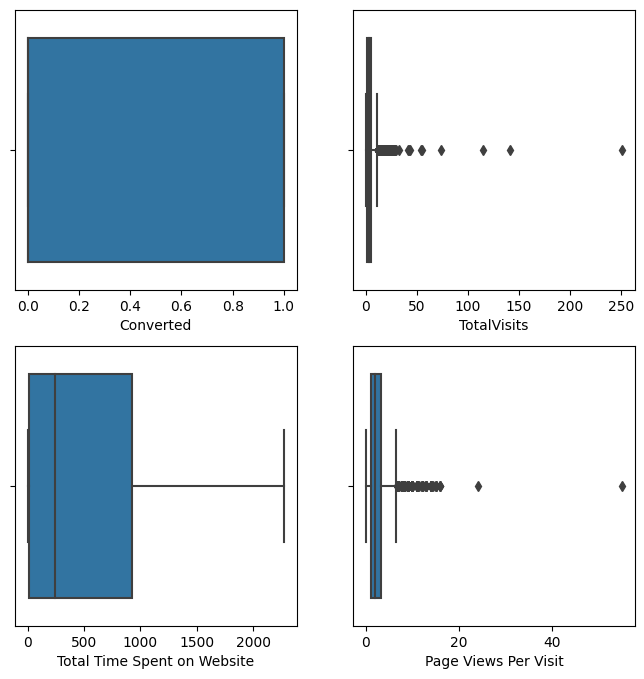

In [29]:
# Finding Outliers
plt.figure(figsize=(8, 8))
num_cols=leads.describe().columns.tolist()
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = num_cols[i], data = leads)
plt.show()

In [30]:
leads = leads[leads['Page Views Per Visit'] < 20]

In [31]:
leads = leads[leads['TotalVisits'] < 50]

In [32]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


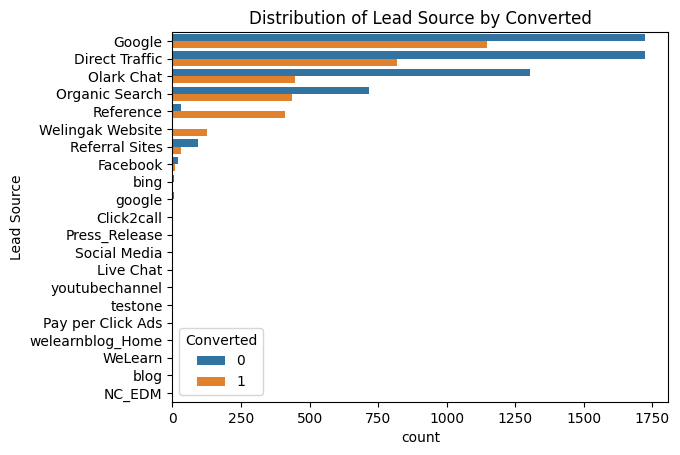

In [33]:
# Plotiing Bar Chart
def Val_count_by_converted(feature, target='Converted'):
    sns.countplot(y=feature, data=leads, hue=target, order = leads[feature].value_counts().index)
    plt.title("Distribution of " + feature + " by Converted")
    plt.show()
Val_count_by_converted('Lead Source')

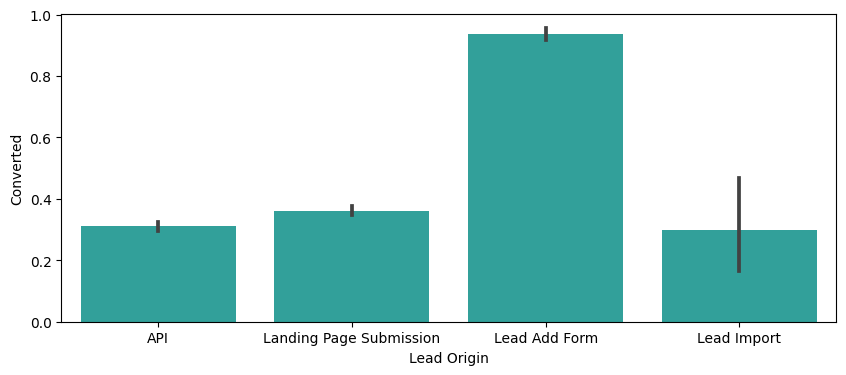

In [34]:
plt.figure(figsize=(10,4))
g = sns.barplot(x='Lead Origin', y='Converted', data=leads, color="LightSeaGreen")
plt.show()

In [35]:
to_change = ['Do Not Call', 'Do Not Email']
leads[to_change] = leads[to_change].replace({'Yes': 1, 'No':0})

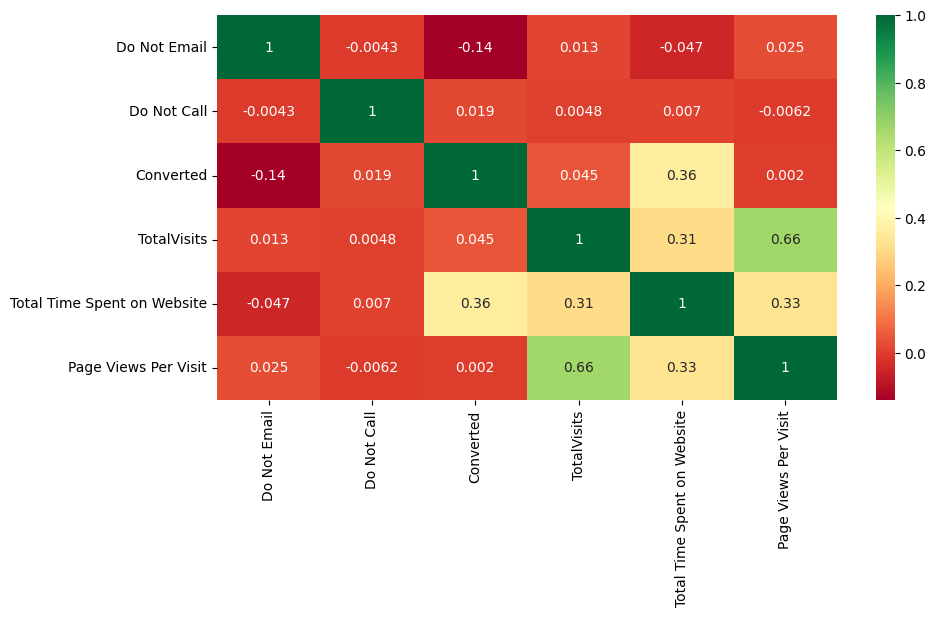

In [36]:
# Plotting a heatmap to find correlation
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(),annot=True, cmap= 'RdYlGn')
plt.show()

In [37]:
leads['TotalVisits']

0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: TotalVisits, Length: 9067, dtype: float64

In [38]:
# Creating Dummy Columns
dummies =  pd.get_dummies(leads.select_dtypes(include=['object']), drop_first=True)

In [39]:
leads =pd.concat([leads,dummies],axis=1)

In [40]:
leads['TotalVisits']

0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: TotalVisits, Length: 9067, dtype: float64

In [41]:
# Getting the cleaned df
lead_df = leads.drop(leads.select_dtypes(include=['object']).columns, axis=1)

In [42]:
lead_df['TotalVisits']

0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: TotalVisits, Length: 9067, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
lead_train_df, lead_test_df = train_test_split(lead_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
#Checking the shape
print(lead_train_df.shape)
print(lead_test_df.shape)

(6346, 158)
(2721, 158)


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Scaling columns
scaler = MinMaxScaler()

In [47]:
lead_train_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(lead_train_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
lead_train_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Unemployed,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Cha

In [48]:
#checking X-train dataset after scaling
lead_train_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Unemployed,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Cha

`lead source reference` and `lead_Origin_Lead_Add_From`are highly correlated.

#### Dividing into X and Y sets for the model building¶

In [49]:
y_train = lead_train_df.pop('Converted')
X_train = lead_train_df

In [50]:
print(y_train.shape)
print(X_train.shape)

(6346,)
(6346, 157)


### Step 5
#### Building our model
#### RFE- Recursive feature elimination

In [51]:
# Importing RFE and Logisticeregression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [52]:
# Running RFE with the output number of the variable equal to 10

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)


In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 127),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 53),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Direct Traffic', False, 39),
 ('Lead Source_Facebook', False, 74),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Live Chat', False, 132),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Pay per Click Ads', False, 130),
 ('Lead Source_Press_Release', False, 98),
 ('Lead Source_Reference', False, 40),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Social Media', False, 104),
 ('Lead Source_WeLearn', False, 137),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 95),
 ('Lead Source_blog', False, 57),
 ('Lead Source_google', False, 45),
 ('Lead Source_te

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Country_Saudi Arabia', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unemployed',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       ...
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=137)

### Building model using statsmodel, for the detailed statistics

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm = logm1.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1180.4
Date:                Mon, 27 Feb 2023   Deviance:                       2360.8
Time:                        12:05:23   Pearson chi2:                 7.63e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6169
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.7766      0.243    -19.652      0.000      -5.253      -4.300
Total Time Spent on Website                                4.6985      0.266     17.670      0.000       4.177       5.220
Lead Origin_Lead Add Form                                  1.5745      0.440      3.575      0.000       0.711       2.438
Lead Source_Olark Chat                                     1.2898      0.152      8.506      0.000       0.993       1.587
Lead Source_Welingak Website                               3.8765      0.852      4.551      0.000       2.207       5.546
Last Activity_SMS Sent                                     1.2610      0.235      5.378      0.000       0.801       1.721
Country_Saudi Arabia                                      -2.4961      1.104     -2.261      0.024      -4.660      -0.332
Tags_Busy                                                  2.6689      0.321      8.324      0.000       2.040       3.297
Tags_Closed by Horizzon                                    8.8530      0.768     11.522      0.000       7.347      10.359
Tags_Lateral student                                      28.2730   9.25e+04      0.000      1.000   -1.81e+05    1.81e+05
Tags_Lost to EINS                                          7.8616      0.639     12.297      0.000       6.609       9.115
Tags_Ringing                                              -1.5022      0.313     -4.802      0.000      -2.115      -0.889
Tags_Unemployed                                            2.0254      0.220      9.215      0.000       1.595       2.456
Tags_Want to take admission but has financial problems     3.1639      1.178      2.687      0.007       0.856       5.472
Tags_Will revert after reading the email                   6.7826      0.281     24.132      0.000       6.232       7.334
Tags_invalid number                                       -2.3628      1.203     -1.964      0.050      -4.721      -0.005
Tags_switched off                                         -2.2207      0.657     -3.379      0.001      -3.509      -0.933
Tags_wrong number given                                  -22.2913   1.88e+04     -0.001      0.999   -3.69e+04    3.68e+04
Last Notable Activity_Modified                            -1.5056      0.158     -9.537      0.000      -1.815      -1.196
Last Notable Activity_Olark Chat Conversation             -1.7840      0.436     -4.089      0.000      -2.639      -0.929
Last Notable Activity_SMS Sent                             1.2069      0.271      4.448      0.000       0.675       1.739
==========================================================================================================================
"""

In [58]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.58
20,Last Notable Activity_SMS Sent,4.77
5,Last Activity_SMS Sent,4.16
14,Tags_Will revert after reading the email,2.37
12,Tags_Unemployed,2.14
2,Lead Origin_Lead Add Form,1.70
11,Tags_Ringing,1.66
18,Last Notable Activity_Modified,1.50
1,Total Time Spent on Website,1.46
3,Lead Source_Olark Chat,1.34


In [60]:
X_train_rfe.drop('Tags_Lateral student', axis = 1, inplace = True)

In [61]:
# Refit the model with the new set of features
X_train_rfe = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm2 = logm2.fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1187.7
Date:                Mon, 27 Feb 2023   Deviance:                       2375.4
Time:                        12:05:23   Pearson chi2:                 7.62e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6160
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.6925      0.237    -19.799      0.000      -5.157      -4.228
Total Time Spent on Website                                4.6722      0.265     17.654      0.000       4.153       5.191
Lead Origin_Lead Add Form                                  1.5602      0.440      3.548      0.000       0.698       2.422
Lead Source_Olark Chat                                     1.2978      0.151      8.581      0.000       1.001       1.594
Lead Source_Welingak Website                               3.8779      0.851      4.555      0.000       2.209       5.547
Last Activity_SMS Sent                                     1.3364      0.232      5.750      0.000       0.881       1.792
Country_Saudi Arabia                                      -2.4877      1.104     -2.254      0.024      -4.651      -0.324
Tags_Busy                                                  2.5799      0.316      8.153      0.000       1.960       3.200
Tags_Closed by Horizzon                                    8.7731      0.767     11.442      0.000       7.270      10.276
Tags_Lost to EINS                                          7.7737      0.637     12.200      0.000       6.525       9.023
Tags_Ringing                                              -1.5797      0.309     -5.113      0.000      -2.185      -0.974
Tags_Unemployed                                            1.9370      0.214      9.060      0.000       1.518       2.356
Tags_Want to take admission but has financial problems     3.0743      1.180      2.606      0.009       0.762       5.386
Tags_Will revert after reading the email                   6.6982      0.276     24.258      0.000       6.157       7.239
Tags_invalid number                                       -2.4353      1.200     -2.030      0.042      -4.786      -0.084
Tags_switched off                                         -2.2987      0.655     -3.509      0.000      -3.583      -1.015
Tags_wrong number given                                  -21.3689   1.14e+04     -0.002      0.999   -2.24e+04    2.23e+04
Last Notable Activity_Modified                            -1.5055      0.158     -9.558      0.000      -1.814      -1.197
Last Notable Activity_Olark Chat Conversation             -1.7815      0.435     -4.092      0.000      -2.635      -0.928
Last Notable Activity_SMS Sent                             1.1338      0.269      4.212      0.000       0.606       1.661
==========================================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.57
19,Last Notable Activity_SMS Sent,4.76
5,Last Activity_SMS Sent,4.14
13,Tags_Will revert after reading the email,2.36
11,Tags_Unemployed,2.14
2,Lead Origin_Lead Add Form,1.70
10,Tags_Ringing,1.66
17,Last Notable Activity_Modified,1.50
1,Total Time Spent on Website,1.46
3,Lead Source_Olark Chat,1.34


In [63]:
X_train_rfe.drop('Tags_wrong number given', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features
X_train_rfe = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm3 = logm3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.5
Date:                Mon, 27 Feb 2023   Deviance:                       2383.0
Time:                        12:05:24   Pearson chi2:                 7.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6156
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.8105      0.238    -20.254      0.000      -5.276      -4.345
Total Time Spent on Website                                4.6750      0.264     17.685      0.000       4.157       5.193
Lead Origin_Lead Add Form                                  1.5726      0.441      3.566      0.000       0.708       2.437
Lead Source_Olark Chat                                     1.3030      0.151      8.624      0.000       1.007       1.599
Lead Source_Welingak Website                               3.8650      0.852      4.537      0.000       2.196       5.535
Last Activity_SMS Sent                                     1.3299      0.233      5.719      0.000       0.874       1.786
Country_Saudi Arabia                                      -2.4834      1.103     -2.252      0.024      -4.645      -0.322
Tags_Busy                                                  2.7101      0.315      8.603      0.000       2.093       3.328
Tags_Closed by Horizzon                                    8.8831      0.767     11.581      0.000       7.380      10.386
Tags_Lost to EINS                                          7.8876      0.638     12.371      0.000       6.638       9.137
Tags_Ringing                                              -1.4390      0.307     -4.695      0.000      -2.040      -0.838
Tags_Unemployed                                            2.0597      0.214      9.645      0.000       1.641       2.478
Tags_Want to take admission but has financial problems     3.1908      1.180      2.704      0.007       0.878       5.503
Tags_Will revert after reading the email                   6.8146      0.277     24.634      0.000       6.272       7.357
Tags_invalid number                                       -2.2922      1.198     -1.913      0.056      -4.641       0.056
Tags_switched off                                         -2.1558      0.654     -3.297      0.001      -3.437      -0.874
Last Notable Activity_Modified                            -1.5020      0.158     -9.526      0.000      -1.811      -1.193
Last Notable Activity_Olark Chat Conversation             -1.7838      0.436     -4.096      0.000      -2.637      -0.930
Last Notable Activity_SMS Sent                             1.1100      0.269      4.131      0.000       0.583       1.637
==========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.34
18,Last Notable Activity_SMS Sent,4.76
5,Last Activity_SMS Sent,4.13
13,Tags_Will revert after reading the email,2.32
11,Tags_Unemployed,2.09
2,Lead Origin_Lead Add Form,1.70
10,Tags_Ringing,1.63
16,Last Notable Activity_Modified,1.49
1,Total Time Spent on Website,1.46
3,Lead Source_Olark Chat,1.34


In [66]:
X_train_rfe.drop('Tags_invalid number', axis = 1, inplace = True)

In [67]:
# Refit the model with the new set of features
X_train_rfe = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm4 = logm4.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.4
Date:                Mon, 27 Feb 2023   Deviance:                       2388.8
Time:                        12:05:24   Pearson chi2:                 7.58e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6152
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.9366      0.236    -20.889      0.000      -5.400      -4.473
Total Time Spent on Website                                4.6790      0.264     17.693      0.000       4.161       5.197
Lead Origin_Lead Add Form                                  1.5850      0.442      3.584      0.000       0.718       2.452
Lead Source_Olark Chat                                     1.3050      0.151      8.651      0.000       1.009       1.601
Lead Source_Welingak Website                               3.8511      0.852      4.518      0.000       2.181       5.522
Last Activity_SMS Sent                                     1.3258      0.233      5.695      0.000       0.870       1.782
Country_Saudi Arabia                                      -2.4787      1.102     -2.250      0.024      -4.638      -0.319
Tags_Busy                                                  2.8489      0.312      9.117      0.000       2.236       3.461
Tags_Closed by Horizzon                                    9.0021      0.767     11.737      0.000       7.499      10.505
Tags_Lost to EINS                                          8.0105      0.637     12.567      0.000       6.761       9.260
Tags_Ringing                                              -1.2892      0.303     -4.257      0.000      -1.883      -0.696
Tags_Unemployed                                            2.1916      0.212     10.355      0.000       1.777       2.606
Tags_Want to take admission but has financial problems     3.3147      1.180      2.808      0.005       1.001       5.628
Tags_Will revert after reading the email                   6.9396      0.276     25.149      0.000       6.399       7.480
Tags_switched off                                         -2.0036      0.652     -3.073      0.002      -3.281      -0.726
Last Notable Activity_Modified                            -1.4994      0.158     -9.499      0.000      -1.809      -1.190
Last Notable Activity_Olark Chat Conversation             -1.7857      0.436     -4.098      0.000      -2.640      -0.932
Last Notable Activity_SMS Sent                             1.0823      0.268      4.033      0.000       0.556       1.608
==========================================================================================================================
"""

In [68]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.01
17,Last Notable Activity_SMS Sent,4.75
5,Last Activity_SMS Sent,4.13
13,Tags_Will revert after reading the email,2.25
11,Tags_Unemployed,2.02
2,Lead Origin_Lead Add Form,1.70
10,Tags_Ringing,1.60
15,Last Notable Activity_Modified,1.49
1,Total Time Spent on Website,1.46
3,Lead Source_Olark Chat,1.34


All the VIF values are good and all the p-values are below 0.05.

We can cosider the model lm4 as the p-values and vif for all the predictors is significant

In [69]:
y_train_pred = lm4.predict(X_train_rfe)
y_train_pred[:10]

2178    0.061515
7033    0.993936
6889    0.050242
4062    0.999966
7421    0.989036
421     0.001493
3120    0.990095
6245    0.191551
3045    0.871941
1306    0.922489
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06151517, 0.99393563, 0.05024212, 0.99996602, 0.98903567,
       0.00149274, 0.99009462, 0.19155118, 0.87194101, 0.92248887])

###### Creating a dataframe with the actual converted flag and the predicted probabilities

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.061515,2178
1,1,0.993936,7033
2,0,0.050242,6889
3,1,0.999966,4062
4,1,0.989036,7421


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0¶

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.061515,2178,0
1,1,0.993936,7033,1
2,0,0.050242,6889,0
3,1,0.999966,4062,1
4,1,0.989036,7421,1


In [73]:
from sklearn import metrics

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3753  159]
 [ 286 2148]]


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9298770879294044


#### Metrics beyond simply accuracy

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8824979457682827

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.9593558282208589

In [79]:
# Calculate false postive rate - predicting Converted when Lead does not have Converted
print(FP/ float(TN+FP))

0.040644171779141106


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.9310793237971391


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9291903936617975


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

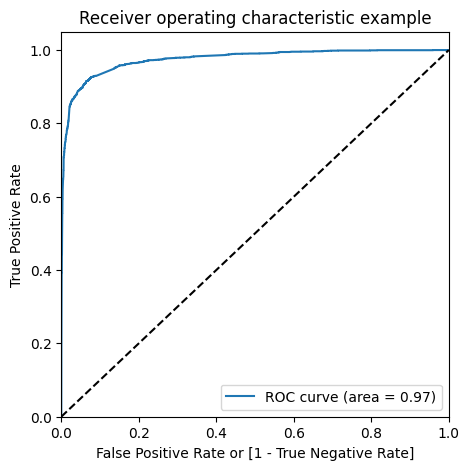

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061515,2178,0,1,0,0,0,0,0,0,0,0,0
1,1,0.993936,7033,1,1,1,1,1,1,1,1,1,1,1
2,0,0.050242,6889,0,1,0,0,0,0,0,0,0,0,0
3,1,0.999966,4062,1,1,1,1,1,1,1,1,1,1,1
4,1,0.989036,7421,1,1,1,1,1,1,1,1,1,1,1


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.383549     1.000000     0.000000
0.1          0.1  0.855027     0.970008     0.783487
0.2          0.2  0.919477     0.929334     0.913344
0.3          0.3  0.925465     0.917009     0.930726
0.4          0.4  0.927829     0.903451     0.942996
0.5          0.5  0.929877     0.882498     0.959356
0.6          0.6  0.930192     0.866064     0.970092
0.7          0.7  0.927513     0.845522     0.978528
0.8          0.8  0.910180     0.792112     0.983640
0.9          0.9  0.893791     0.737880     0.990798


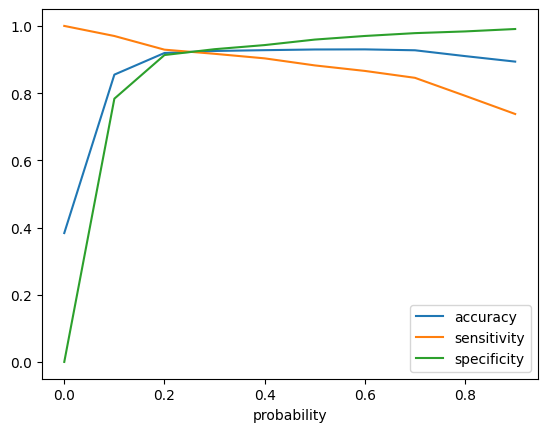

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.061515,2178,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.993936,7033,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.050242,6889,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.999966,4062,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.989036,7421,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9254648597541758

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3641,  271],
       [ 202, 2232]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
FN

202

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9170090386195563

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.9307259713701431

In [94]:
# Calculate false postive rate - predicting Converted when Lead does not have Converted
print(FP/ float(TN+FP))

0.06927402862985685


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8917299240910906


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9474368982565704


#### Precision and Recall

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8917299240910906

In [99]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9170090386195563

### Precision and Recall Trade-off

In [100]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [101]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

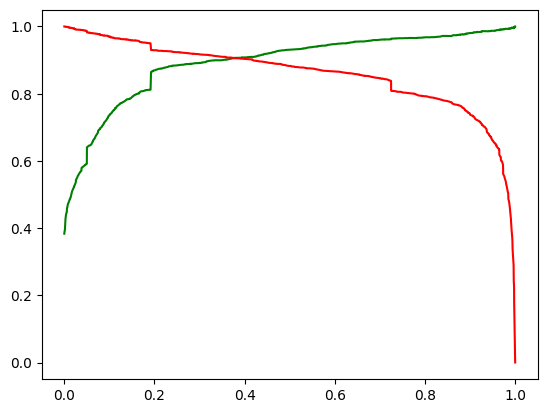

In [102]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [103]:
lead_test_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(lead_test_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
lead_test_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Unemployed,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Cha

### Dividing into X_test and y_test

In [104]:
y_test = lead_test_df.pop('Converted')
X_test = lead_test_df

In [105]:
X_train_rfe.drop(['const'], axis=1, inplace=True)

In [106]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [107]:
X_test_new.shape

(2721, 18)

In [108]:
# Making predictions
y_test_pred = lm4.predict(X_test_new)
y_test_pred[:10]

3053    0.004533
686     0.982314
4091    0.995630
737     0.999413
4390    0.032814
4064    0.050242
7021    0.979465
5415    0.082465
8596    0.026808
3334    0.014938
dtype: float64

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3053,0.004533
686,0.982314
4091,0.995630
737,0.999413
4390,0.032814


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [112]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.004533
1,1,0.982314
2,1,0.995630
3,1,0.999413
4,0,0.032814


In [113]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
# Putting leadID to index
y_test_df['leadID'] = y_test_df.index

In [114]:
# Rearranging the columns
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.004533
1,1,0.982314
2,1,0.995630
3,1,0.999413
4,0,0.032814


In [115]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.004533,0
1,1,0.982314,1
2,1,0.995630,1
3,1,0.999413,1
4,0,0.032814,0


In [116]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9198823961778758

In [117]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1606,  116],
       [ 102,  897]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8978978978978979

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.9326364692218351

In [121]:
# Precision
TP / (TP + FP)

0.8854886475814413

In [122]:
#Recall 
TP / (TP + FN)

0.8978978978978979

--- With the current cut off as 0.42 we have Precision around 88% and Recall around 89%___